<h1>Data Project</h1>
<h2>Technology Stocks Market Analysis</h2>

In this portfolio project I will be looking at data from the stock market, particularly some technology stocks.

I will use pandas to get stock information, visualize different aspects of it, and finally look at a few ways of analyzing the risk of a stock, based on its previous performance history.

The windown period for analisys is one year from the today's date , so **FROM 24/03/2020, TO 24/03/2021**.

This project was based on the Stock Market Analysis by Jose Portilla

The goal of this portifolio answer the following questions for basic analysis of stock information:

<ol>
<li>What was the change in price of the Apple stock over time?</li>

<li>What was the moving average of the Apple stocks?</li>

<li>What was the daily return of the Apple stock on average?</li>

<li>What was the correlation between different stocks' daily returns?</li>

<li>What are the risks and the expected return for each stock?</li>
  </ol>

<h3>Importing Libraries</h3>

In [1]:
#Libraries
import pandas as pd
from pandas import Series , DataFrame 
import numpy as np 
    

In [2]:
#Visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#reading stock data using pandas 
import pandas_datareader as pdr


In [4]:
#time stamp
import datetime
import io
from datetime import datetime

<h3>Getting Data from Yahoo financial </h3>

In [5]:
# start and end days
end = datetime.now()

start = datetime(end.year - 1 , end.month, end.day)

In [6]:
 AAPL = pdr.get_data_yahoo('AAPL', start, end)

<h3>Dataset</h3>

In [7]:
#Apple stocks market 
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-24,61.922501,58.575001,59.090000,61.720001,287531200.0,61.245258
2020-03-25,64.562500,61.075001,62.687500,61.380001,303602000.0,60.907871
2020-03-26,64.669998,61.590000,61.630001,64.610001,252087200.0,64.113029
2020-03-27,63.967499,61.762501,63.187500,61.935001,204216800.0,61.458603
2020-03-30,63.880001,62.349998,62.685001,63.702499,167976400.0,63.212502
...,...,...,...,...,...,...
2021-03-18,123.180000,120.320000,122.879997,120.529999,121229700.0,120.529999
2021-03-19,121.430000,119.680000,119.900002,119.989998,185023200.0,119.989998
2021-03-22,123.870003,120.260002,120.330002,123.389999,111912300.0,123.389999



The dataset is organised by only one index (*Date*) and five columns (*High* , *Low* , *Open* , *Close* , *Volume* and *Adj Close*) 

Althought the columns name are self-explanatory, here is some explanation.<br><br>
<dl>
<dt>Date (index)</dt><dd> Period range from 24/03/2020, to 24/03/2021.</dd>
<dt>High/Low</dt><dd> The high and low refer to the maximum and minimum prices in a given date.</dd>
<dt>Open/Close</dt><dd> The Open and close are the prices at which a stock began and ended trading in the date.</dd>
<dt>Volume</dt><dd> The Volume is the total amount of trading activity in the day.</dd>
<dt>Adj Close</dt><dd> The Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.</dd>
    </dl>

<h4>Sumary stats and general information</h4>

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,108.829605,105.837213,107.408765,107.373646,1.393605e+08,107.055791
std,22.439333,21.798068,22.313806,22.078717,5.437553e+07,22.201218
min,61.287498,58.575001,59.090000,60.227501,4.669130e+07,59.764240
25%,90.542503,87.820000,88.787498,89.717499,1.006209e+08,89.268394
50%,116.550003,113.610001,115.230003,115.080002,1.265088e+08,114.710388
75%,125.389999,121.839996,124.050003,123.989998,1.659448e+08,123.970551
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-03-24 to 2021-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<h2> Let's Get Started!</h2>
    
I will analysis the Apple Stocks using the Adjusted closing price. 

According to Investopedia, THE ADJUSTED CLOSING PRICE  is often used when examining historical returns or doing a detailed analysis of past performance. You can check the explanation [here](https://www.investopedia.com/terms/a/adjusted_closing_price.asp)

 The CLOSING PRICE is the raw price, which is just the cash value of the last transacted price before the market closes. The adjusted closing price consider anything that might affect the stock price after the market closes.

<h3>1.) What was the change in price of the Apple stock over time?</h3>

<AxesSubplot:xlabel='Date'>

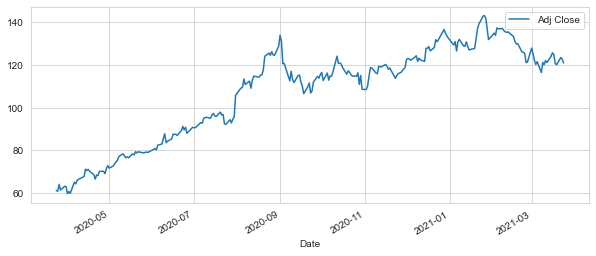

In [10]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))

It is easy to note that the price of Apple stocks increased over the year. But how many?

Here are the values of the stocks on the first day of the dataframe and one year later. 

In [11]:
AAPL.iloc[[0,-1]]['Adj Close']

Date
2020-03-24     61.245258
2021-03-24    120.830002
Name: Adj Close, dtype: float64

To find the percentage change in a stock price, simply get the difference between the old and new price and divide it by the old price then, multiply by 100 to get the percent change

<p style="font-size:20px;text-align:center;">&Delta; % = ( (p2-p1) / p1 )*100</p>

In [12]:
#The ajusted close price variantion in one year 

AAPL['Adj Close'].pct_change(periods= len (AAPL)-1).tail(1)*100



Date
2021-03-24    97.288745
Name: Adj Close, dtype: float64

The stocks increased by 100%. In other words, the stocks doubled in one year time. 

<AxesSubplot:xlabel='Date'>

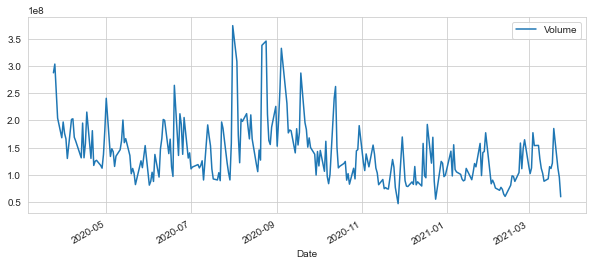

In [13]:
#The volume variation during the period

AAPL['Volume'].plot(legend= True, figsize = (10,4))

<h3>2) What was the moving average of the Apple stocks? </h3>

MA are usually calculated to identify the trend direction of a stock or to determine its support and resistance levels.

A simple moving average is formed by calculating the average price of a stock over a specific number of periods.

 The moving average reduces the impact of short-term fluctuations on a stock's price over a specified time-frame. It means the moving average filters out the "noise" from random short-term price fluctuations.

You can find more about  moving average [https://www.investopedia.com/terms/m/movingaverage.asp]<br><br>

For this project, I will calculate the moving average for  10, 20 and 50 days and then plot them altogether.

In [14]:
#moved average days
ma_day = [10,20,50]

#rolling at least 1 arguments ,windown
for ma in ma_day: 
    column_name = str(ma) 
    AAPL[column_name] = AAPL['Adj Close'].rolling(window =ma).mean()


[]

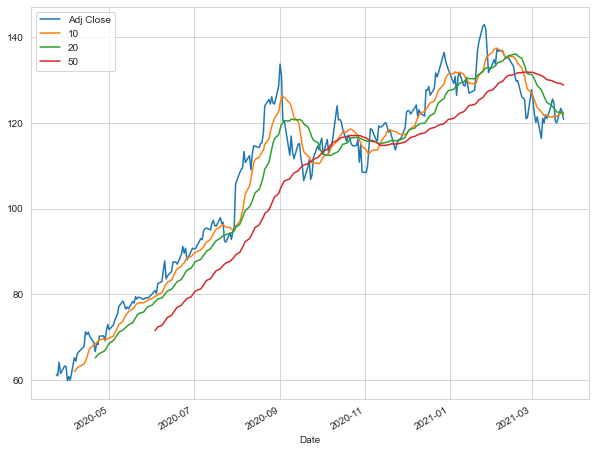

In [15]:
AAPL[['Adj Close' , '10' , '20' , '50']].plot(subplots = False, figsize=(10,8)).plot(subplots=False,figsize=(10,4))

We can note on the graphic above that the MA of 50 days is smoother then MA of 10 days. The bigger is the windown  the smoother is the line , it is less susteivel to the dayli ocilation 

<h3>3.) What was the daily return of the Apple stocks on average?</h3>

The daily return is the daily change of the stock. It is is computed by the percentage change from the immediately previous day. That will tell how many percent a stock changed from the previous day<br>

The daily return is a first steep for a deeper analisys. 


First, I will plot the the daily return of the stocks over the year. 

<AxesSubplot:xlabel='Date'>

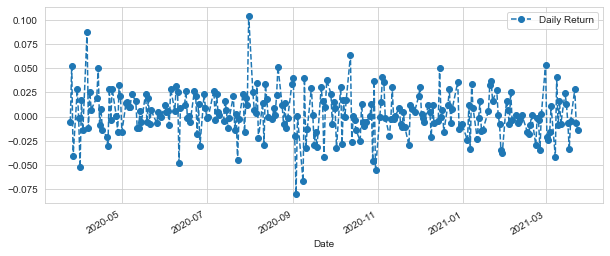

In [16]:
AAPL ['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL ['Daily Return'].plot (figsize = (10,4), legend = True , linestyle = '--' , marker = 'o')


If you are curios about what happend to Apple stocks on Aug-2020 (+10%) and early of Sep-2020(-8%) ?  Here is the answer 
<ul>
    <li>
    <i>"Apple announces 4-for-1 stock split....The shares will be distributed to shareholders at the close of business on August 24, and trading will begin on a split-adjusted basis on August 31."</i>  <a href= "https://www.cnbc.com/2020/07/30/apple-stock-split-announced.html">https://www.cnbc.com/2020/07/30/apple-stock-split-announced.html </a>
    </li>
    <li>
    <i>"Apple announced a 4-for-1 stock split in late July, and begins trading on a split-adjusted basis on Monday."</i><a href ="https://www.cnbc.com/2020/08/31/history-of-apple-stock-splits-says-dont-rush-in-to-buy-cheaper-shares.html">https://www.cnbc.com/2020/08/31/history-of-apple-stock-splits-says-dont-rush-in-to-buy-cheaper-shares.html<a>
    </li>
</ul>

Now, plotting the histogram 

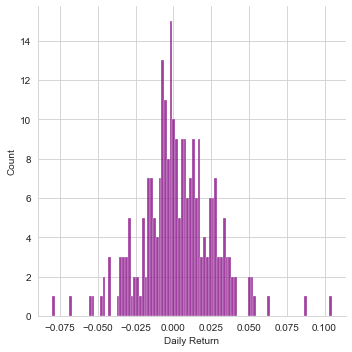

In [17]:
sns.displot(AAPL['Daily Return'].dropna(), bins=100,color='purple')

According to the plot above, the mean of the daily returning is near 0 and there was more positive daily returning then negative. Lets check the mean. 

In [18]:
# Mean daily return 
AAPL['Daily Return'].dropna().mean()

0.0029798449026358044

The mean shows what is the expected daily return. In this case, we can expect to have a +0.3% of return per day.

We can calculate the worst scenario with 95% of confidence. 

In [19]:
AAPL['Daily Return'].dropna().quantile(0.05)

-0.0342999945575913

This means that only 5% of the time, the return daily is - 3,4% or less. 

<h2>Section 2 </h2>

For Section 2, I will grab different stocks. I will get the Adjusted Close price from Apple, Google, Microsoft and Amazon. For the same range of time (24-03-2020, 24-03-2021)

In [20]:
#stock names   
tech_list = ['AAPL' , 'GOOG','MSFT', 'AMZN']

In [21]:
#dataframe with all Adjusted Close price for all the 
closing_df = pdr.get_data_yahoo(tech_list)['Adj Close']

closing_df.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-03-28,24.459534,733.530029,49.094669,579.869995
2016-03-29,25.038527,744.770020,50.167519,593.859985
2016-03-30,25.475679,750.530029,50.479301,598.690002
2016-03-31,25.343138,744.950012,50.644352,593.640015
2016-04-01,25.575666,749.909973,50.956123,598.500000


<h3>4.)What was the correlation between different stocks' daily returns??</h3>

The Correlation test is used to evaluate the association between two or more variables. The correlation coefficient ranges from −1 to 1. A value of 1 or -1 implies that a linear equation describes the strongest relationship possible between the variables, while 0 implies no linear correlation between the variables.

In [22]:
#daily returns of the stocks 
tech_returns = closing_df.pct_change()

First, I am plotting relationships on daily returns between the Tech stocks.

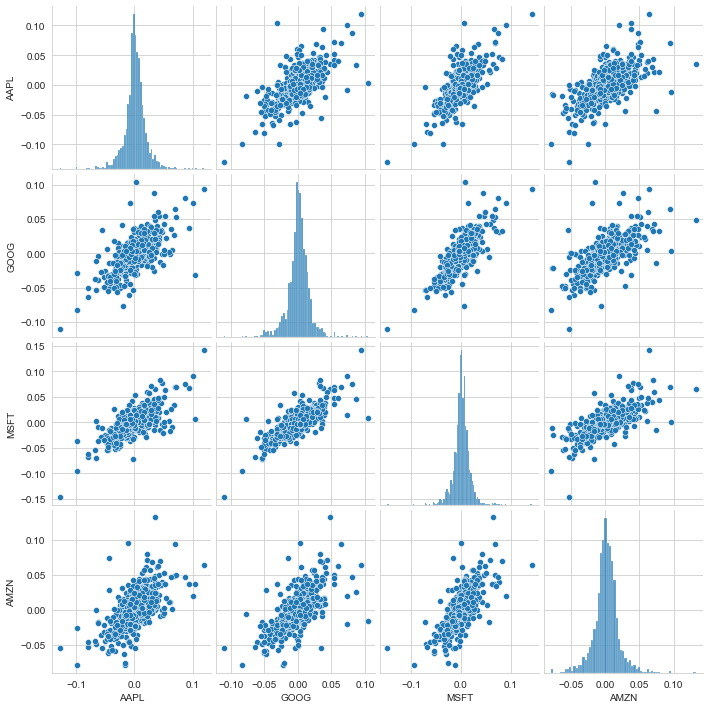

In [23]:
sns.pairplot(tech_returns.dropna())

 We can observe all the relationships on daily returns between the Tech stocks. It is saved to say that all of the correlations are positive among them.  Apparently, Microsoft and Googles seem to have the strongest, while Amazon and Apple have the weakest.  

Let's plot a heatmap and print the correlation coefficient for each pair of stock. 

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

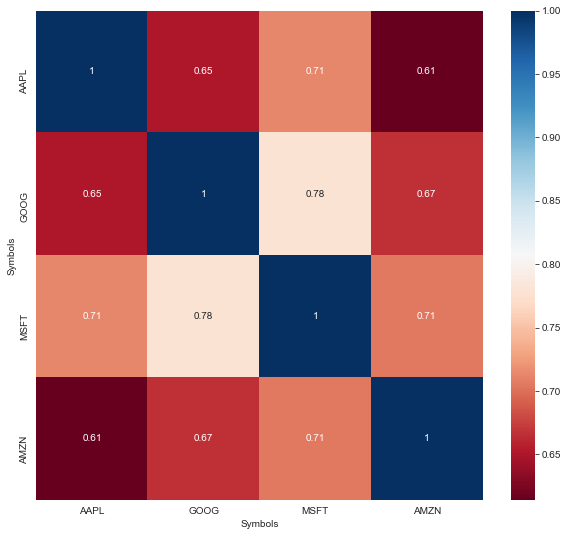

In [24]:
plt.figure(figsize=(10,9))
sns.heatmap(tech_returns.dropna().corr(), annot=True, cmap='RdBu')

#Strongest positive correlations are displayed in blue while the strongest negative correlations are displayed in red.

As suspected, the relationship between microsoft and Google was the strongest in the last year among the four tech stocks. That means, everytime the Micrososoft daily return went up, very likely to Google stocks went up to.

r= 0.7786959226127736


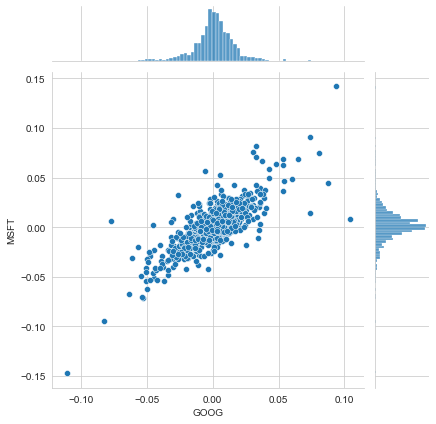

In [25]:
# correlation google x Microsoft
import scipy.stats as st


corr=tech_returns['GOOG'].corr(tech_returns['MSFT'])
print("r= ", end= "")
print(corr)



sns.jointplot(x='GOOG',y='MSFT', data= tech_returns, kind= 'scatter')

<h3>5) What are the risks and the expected return for each stock?</h3>
There are many ways we can quantity the risk, one of the most basic ways using the information we've gather on daily percentage returns is by comparig the expected return (mean) with the risk (standard deviation).

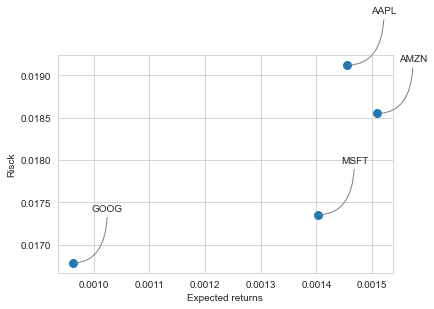

In [26]:
#the daily return using the Adjusted close 

retns = tech_returns.dropna()

area = np.pi*20


plt.scatter(x = retns.mean() , y = retns.std() , s = area )

#set the x and y limits of the plot
#plt.ylim([0.016, 0.019])
#plt.xlim([0.0005, 0.0016])


#set the plot axis titles
plt.xlabel ('Expected returns')
plt.ylabel('Risck')


for label,x,y in zip (retns.columns , retns.mean() , retns.std()):
    plt.annotate(
    label, 
    xy = (x,y) , xytext=(50,50),
    textcoords = 'offset points' , ha = 'right' , va = 'bottom',
    arrowprops = dict (arrowstyle = '-',color="0.5"  , connectionstyle = "angle3" ))

It is preferable the stocks with a strong expected return (mean) and low risk. Analysing the risk and expected return, Microsoft is the best stock among the four tech stocks.